<center> <h1> Income Evaluation</h1> </center>
<br/>
The goal of this project is to predict people's income categories, either '>50K' or '<=50K' based on various demographic attributes.<br/>

The dataset can be found here: [Adult income database](https://www.kaggle.com/wenruliu/adult-income-dataset)

### Table of Contents
* Get the Data
* Data Cleaning
* Exploratory Data Analysis
* Data Preprocessing
* Feature Selection and Clustering
* Classifiers
    * Logistic Regression
    * Decision Tree
    * Random Forests
    * Support Vector Classification
    * K-nearest Neighbors
    * Gaussian Naive Bayes
    * Quadratic Discriminant Analysis
    * AdaBoost
    * Gradient Boosting
    * Multi-layer Perceptron Classifier
 
### Imbalanced Dataset
Many learning algorithms were designed assuming well-balanced class distributions, i.e. no significant differences in class prior probabilities. However, this is not always the case in real world data since one class might be represented by a large number of examples, while the others are represented by only a few, and this is the case for this dataset. The target variable "income" has imbalanced distribution with about 25% being '>50K" and 75% being "<=50K". <br/>
<br/>
**The solution to the imbalanced data are mainly two types: data level methods and the algorithmic level methods.<br/>**
<br/>
**Data level methods**<br/>
Data level methods consist of balancing classes by resampling the original data set, such that under-represented classes are over-sampled, and over-represented classes are under-sampled.<br/>
1. Random over-sampling(non-heuristic method)<br/>
It aims to balance class distribution through the random replication of minority class examples. Since it makes exact copies of examples from the minority class, which can increase the likelihood of overfitting.<br/>
<br/>
2. Oversampling(heuristic method)<br/>
There are two approaches supported for generating new data points, Synthetic Minority Over-sampling Technique (SMOTE) and Adaptive Synthetic Sampling (ADASYN). Both techniques use interpolation to generate new datapoints. To be specific, SMOTE is an over-sampling method with synthetic data generation. Its main idea is to form new minority class examples by interpolating between several examples from the minority class that lie together. And ADASYN uses a weighted distribution for different minority class examples according to their level of difficulty in learning, where more synthetic data is generated for minority class examples that are harder to learn compared to those minority examples that are easier to learn.<br/>
<br/>

3. Random under-sampling(non-heuristic method)<br/>
It aims to balance class distribution through the random elimination of majority class examples. But there is critic that under-sampling can eventually discard data potentially important for learning.<br/>
<br/>
4. Undersampling(heuristic method)<br/>
Some heuristic under-sampling methods include NearMiss,Condensed Nearest Neighbor Rule,Tomek links, One-sided selection, Neighborhood Cleaning Rule. I implemented NearMiss, Tomek links and Neighborhood Cleaning Rule in this notebook.<br/>

**Algorithmic level methods:<br/>**
Idea:  adapting existing algorithms and techniques to the especial characteristics of imbalanced data. 
These proposals include cost-sensitive learning, one-class classifiers, and ensembles of classifiers, among others.

## Get the Data

In [1]:
#import packages
import os
from os import getcwd
getcwd()
import pandas as pd
import seaborn as sns
import numpy as np
import plotly as py
py.offline.init_notebook_mode(connected = True)
from plotly import graph_objs as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('C:\\Users\\linli\\Desktop\\In progress project\\Income Classification')

In [3]:
df = pd.read_csv('income_evaluation.csv')

In [4]:
print(df.shape)
df.head(2)

(32561, 15)


age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   

        marital-status        occupation    relationship    race    sex  \
0        Never-married      Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse   Exec-managerial         Husband   White   Male   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K

## Data Cleaning

In [5]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

Column names have space in the front, need to rename them.

In [6]:
df.columns= ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

Replace the "?" in cells with NaN.

In [7]:
df.replace(' ?', np.NaN, inplace=True)

In [8]:
#detect which cells have missing values, and then count how many there are in each column
missing_val_count_by_column = (df.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column > 0]

workclass         1836
occupation        1843
native_country     583
dtype: int64

In [9]:
#check how many uniques and nulls we got for all variables in a dataframe
def unique_null(df):
    unique = pd.DataFrame( df.nunique(), columns= ['unique#'] )
    null = pd.DataFrame( df.isnull().sum(), columns= ['null#'] )
    tb = pd.concat( [unique, null], axis = 1 )
    tb['observation#'] = df.shape[0]
    
    if tb['null#'].sum() > 0:
        tb = tb[['observation#','unique#', 'null#']].sort_values(by=['null#'], ascending = False)
    elif tb['unique#'].sum() != tb['observation#'].sum():
        tb = tb[['observation#','unique#', 'null#']].sort_values(by=['unique#'], ascending = True)
    else:
        tb = tb[['observation#','unique#', 'null#']].sort_index()

    return tb

In [10]:
unique_null(df)

observation#  unique#  null#
occupation             32561       14   1843
workclass              32561        8   1836
native_country         32561       41    583
age                    32561       73      0
fnlwgt                 32561    21648      0
education              32561       16      0
education_num          32561       16      0
marital_status         32561        7      0
relationship           32561        6      0
race                   32561        5      0
sex                    32561        2      0
capital_gain           32561      119      0
capital_loss           32561       92      0
hours_per_week         32561       94      0
income                 32561        2      0

Three attributes have missing values, let's take care of them one by one.

In [11]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

The counts for top few occupations are very close, impute them with "unknown" instead of the category with highest frequency.

In [12]:
df.occupation.fillna('unknown',inplace=True)

In [13]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [14]:
df.workclass.fillna(' Private',inplace=True)

In [15]:
df.workclass.value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [16]:
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [17]:
df.native_country.fillna(' United-States',inplace=True)

In [18]:
unique_null(df)

observation#  unique#  null#
sex                    32561        2      0
income                 32561        2      0
race                   32561        5      0
relationship           32561        6      0
marital_status         32561        7      0
workclass              32561        8      0
occupation             32561       15      0
education              32561       16      0
education_num          32561       16      0
native_country         32561       41      0
age                    32561       73      0
capital_loss           32561       92      0
hours_per_week         32561       94      0
capital_gain           32561      119      0
fnlwgt                 32561    21648      0

No more missing value!

## Exploratory Data Analysis

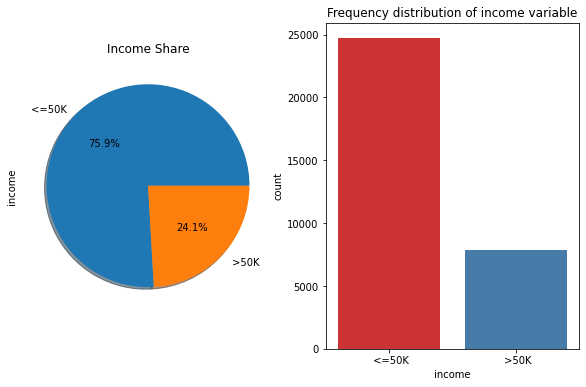

In [19]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(10,6))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')

ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

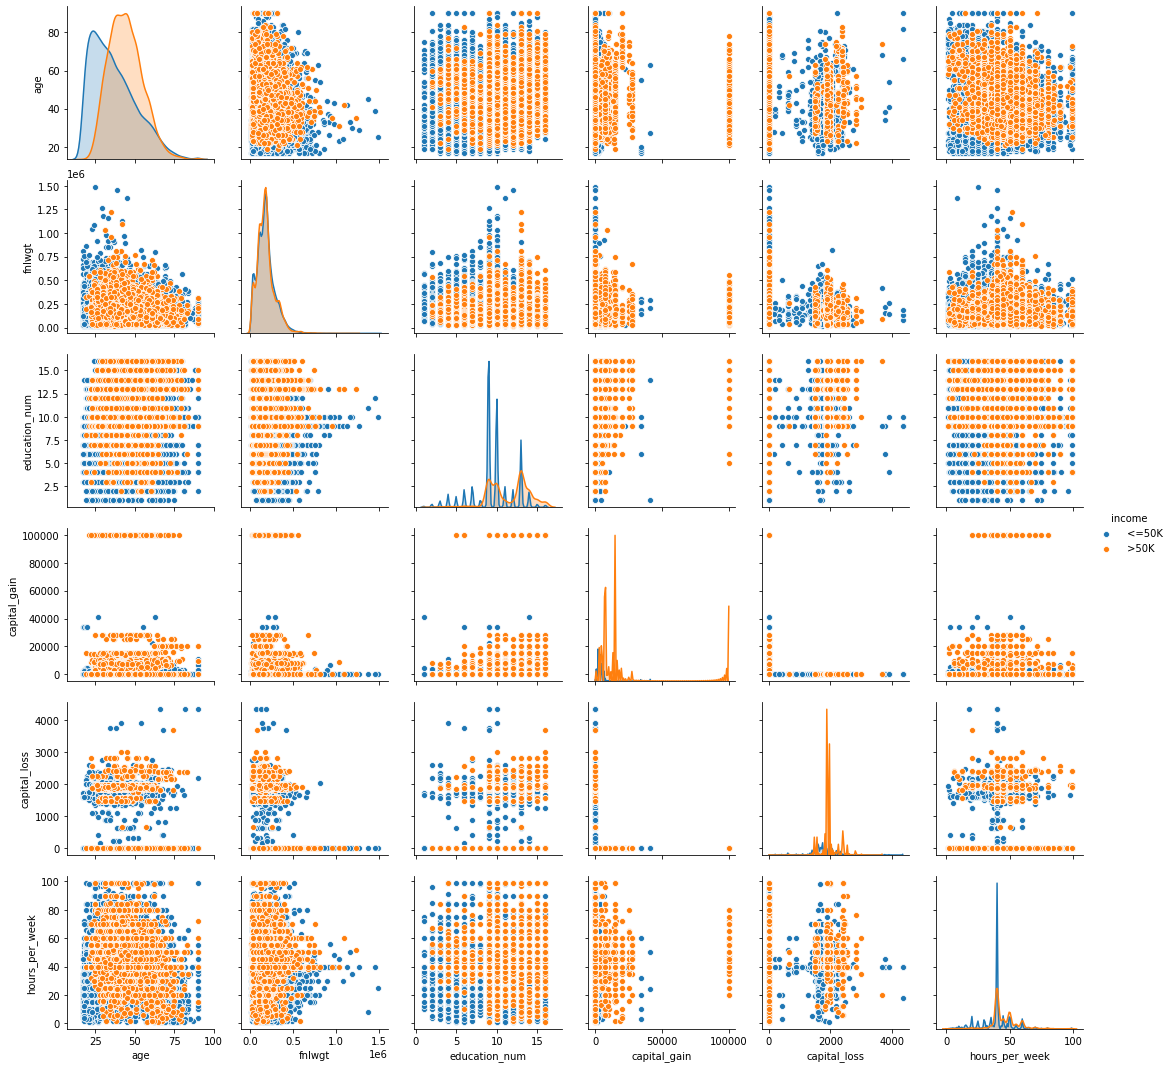

In [20]:
sns.pairplot(df, hue = "income")

Numerical variables

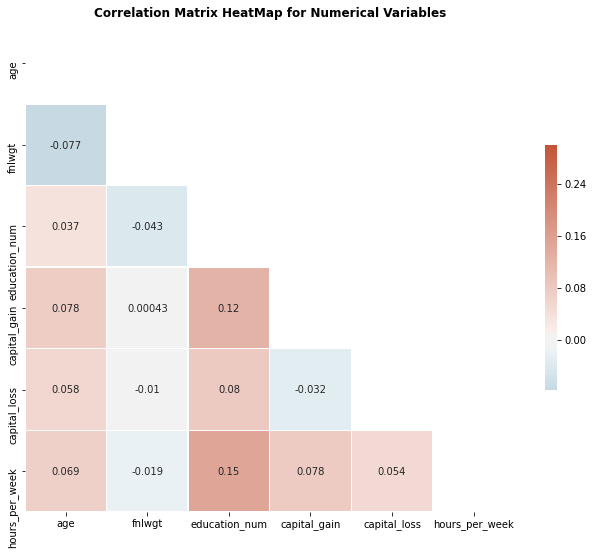

In [21]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(),annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix HeatMap for Numerical Variables",fontweight="bold")
plt.show()

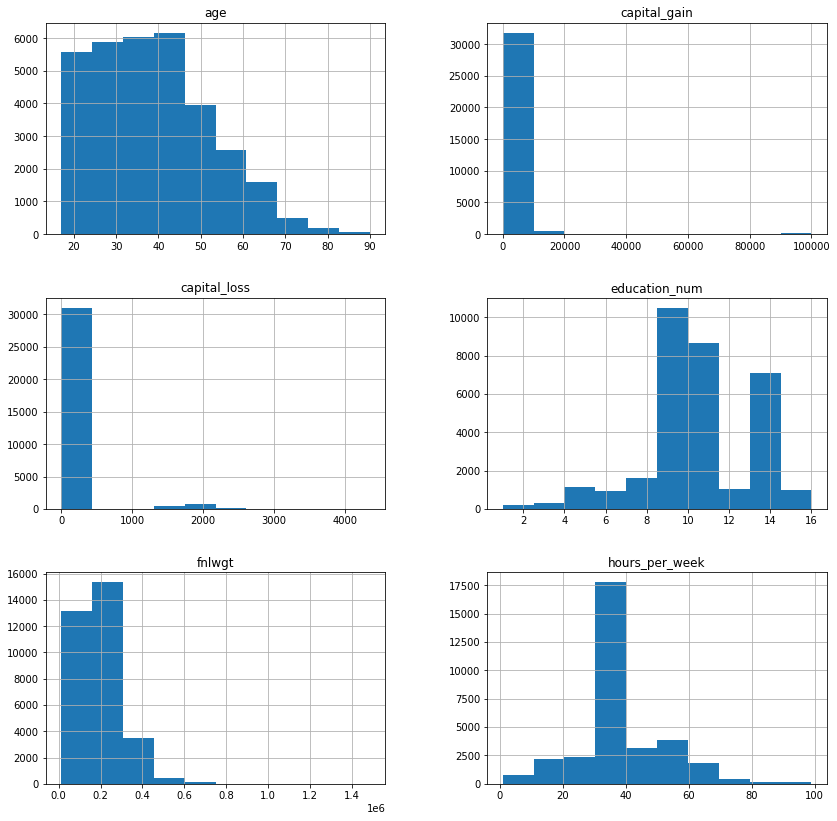

In [22]:
#numerical attributes distribution
p = df.hist(figsize = (14,14))

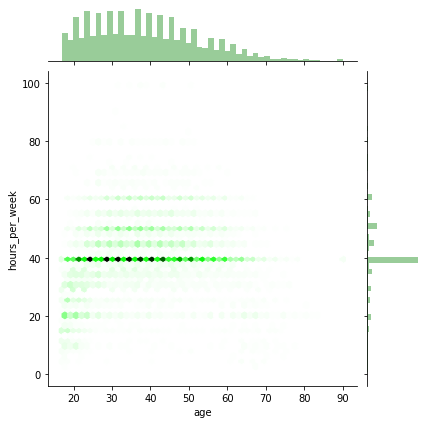

In [23]:
sns.jointplot(x='age',y='hours_per_week',data=df,kind='hex',color='Green')

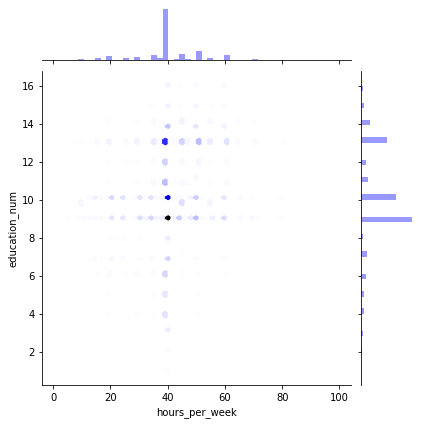

In [24]:
sns.jointplot(x='hours_per_week',y='education_num',data=df,kind='hex',color='blue')

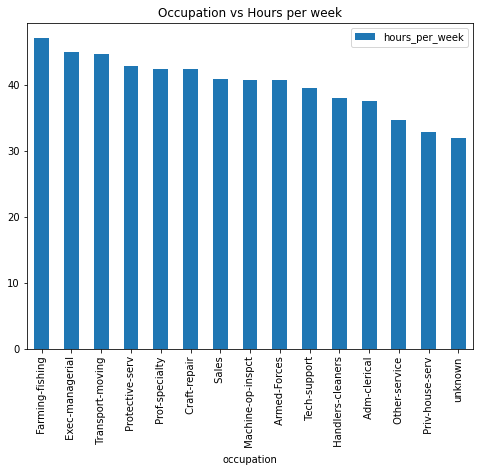

In [25]:
df1 = pd.DataFrame(df.groupby(['occupation'])['hours_per_week'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Occupation vs Hours per week')
plt.show()

Categorical variables

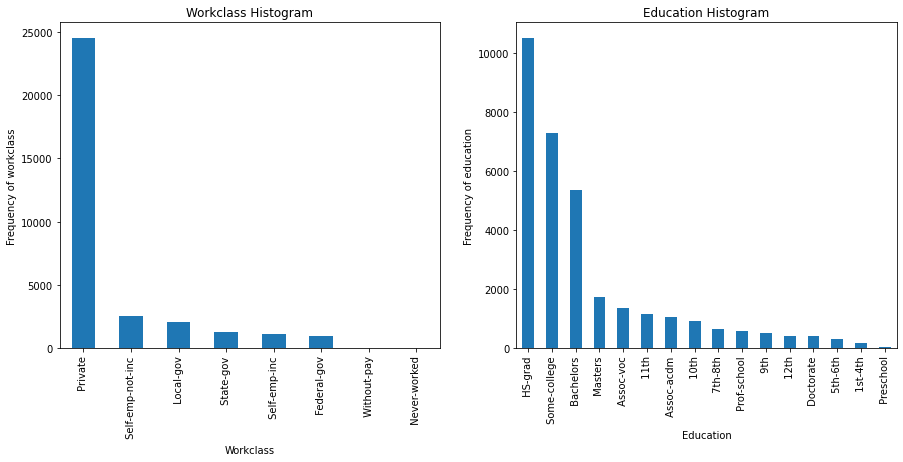

In [26]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt1 = df.workclass.value_counts().plot('bar')
plt.title('Workclass Histogram')
plt1.set(xlabel = 'Workclass', ylabel='Frequency of workclass')

plt.subplot(1,2,2)
plt1 = df.education.value_counts().plot('bar')
plt.title('Education Histogram')
plt1.set(xlabel = 'Education', ylabel='Frequency of education')

plt.show()

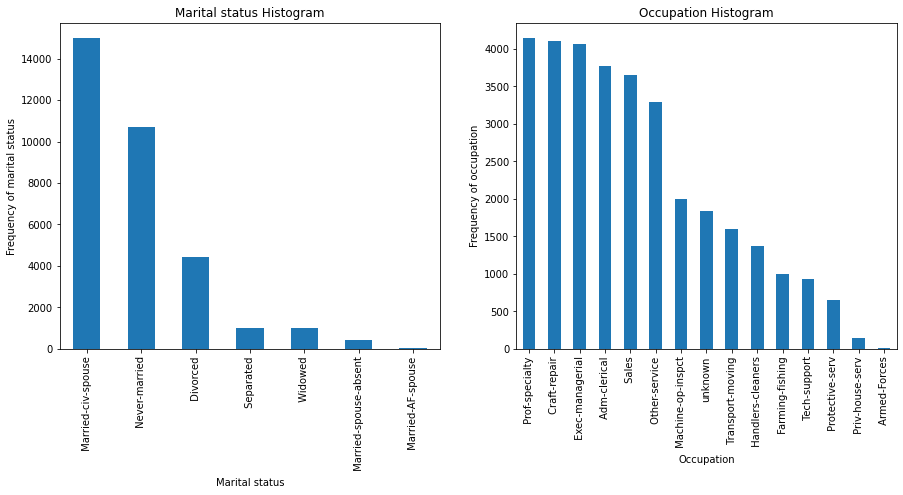

In [27]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt1 = df.marital_status.value_counts().plot('bar')
plt.title('Marital status Histogram')
plt1.set(xlabel = 'Marital status', ylabel='Frequency of marital status')

plt.subplot(1,2,2)
plt1 = df.occupation.value_counts().plot('bar')
plt.title('Occupation Histogram')
plt1.set(xlabel = 'Occupation', ylabel='Frequency of occupation')

plt.show()

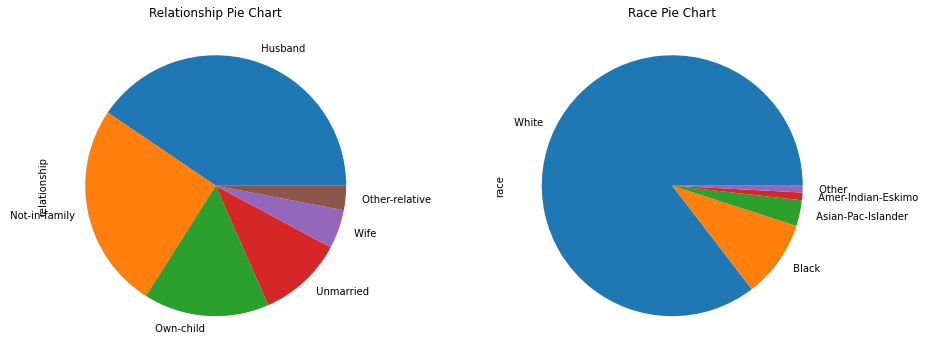

In [28]:
#relationship,race
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt1 = df.relationship.value_counts().plot('pie')
plt.title('Relationship Pie Chart')


plt.subplot(1,2,2)
plt1 = df.race.value_counts().plot('pie')
plt.title('Race Pie Chart')

plt.show()

Numerical and categorical variables' relationships with target variable "income"

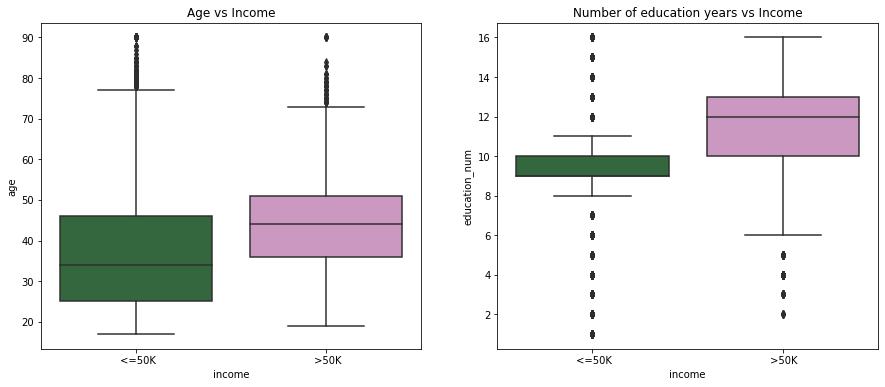

In [29]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Age vs Income')
sns.boxplot(x=df.income, y=df.age, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Number of education years vs Income')
sns.boxplot(x=df.income, y=df.education_num, palette=("cubehelix"))

plt.show()

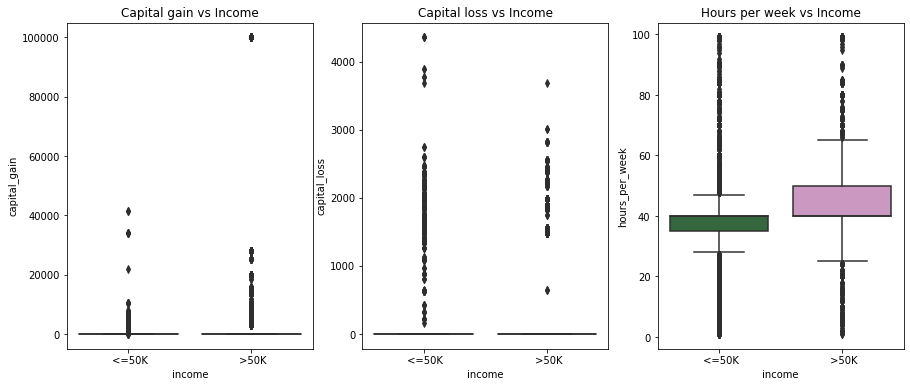

In [30]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title('Capital gain vs Income')
sns.boxplot(x=df.income, y=df.capital_gain, palette=("cubehelix"))

plt.subplot(1,3,2)
plt.title('Capital loss vs Income')
sns.boxplot(x=df.income, y=df.capital_loss, palette=("cubehelix"))

plt.subplot(1,3,3)
plt.title('Hours per week vs Income')
sns.boxplot(x=df.income, y=df.hours_per_week, palette=("cubehelix"))

plt.show()

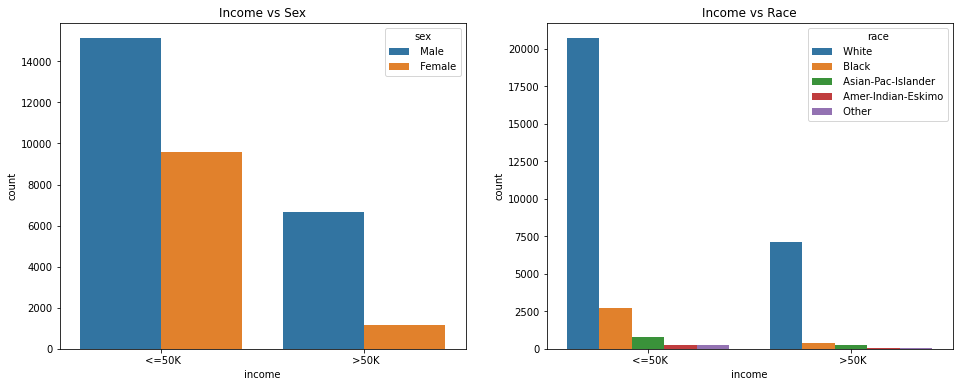

In [31]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Income vs Sex')
sns.countplot(x="income", hue="sex", data=df)

plt.subplot(1,2,2)
plt.title('Income vs Race')
sns.countplot(x="income", hue="race", data=df)

plt.show()

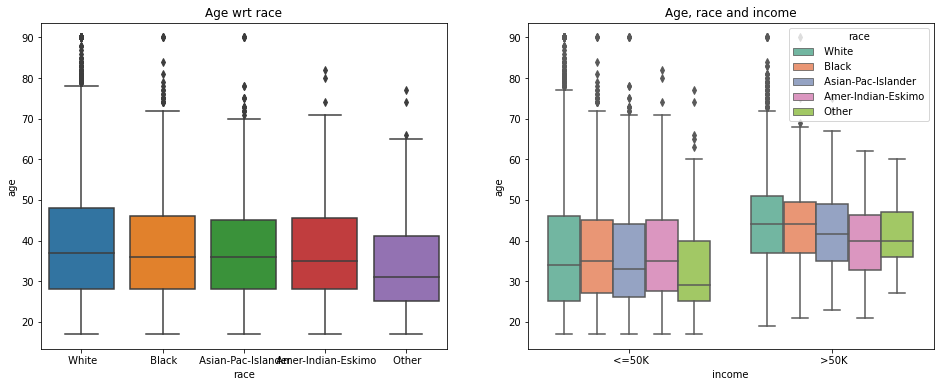

In [32]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title("Age wrt race")
sns.boxplot(x ='race', y="age", data = df)

plt.subplot(1,2,2)
plt.title("Age, race and income")
sns.boxplot(x="income", y="age", hue="race",
                 data=df, palette="Set2")
plt.show()

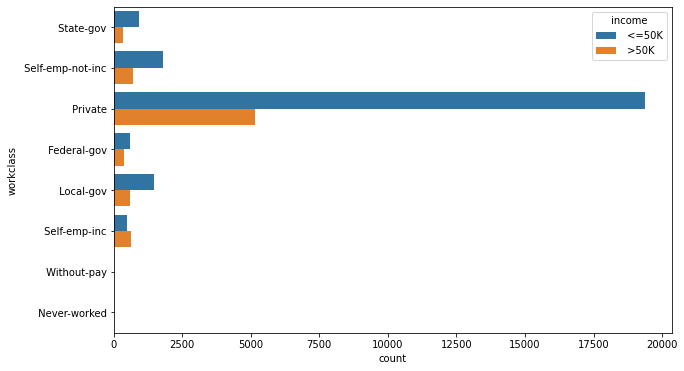

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(y="workclass", hue="income", data=df)

Priveate workclass has much higher income in both classes.

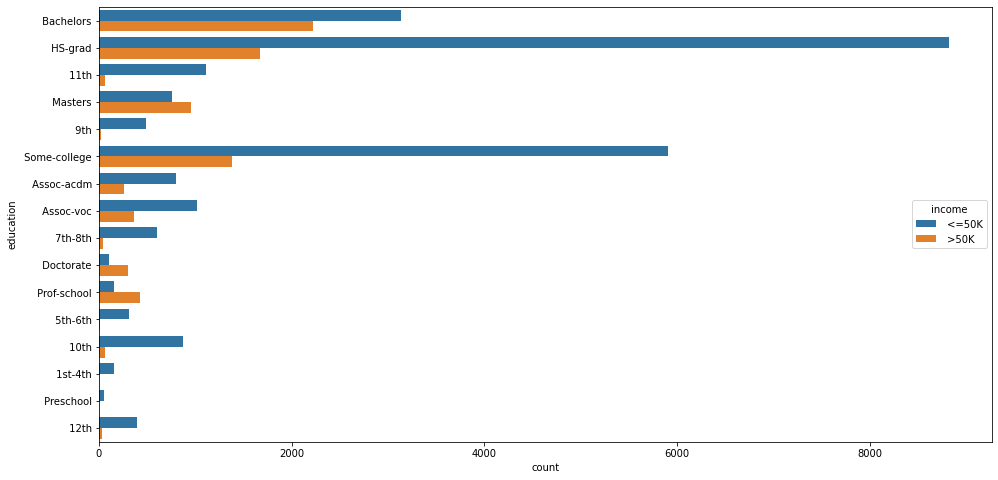

In [34]:
plt.figure(figsize=(16,8))
sns.countplot(y="education",hue="income",data=df)

Among people who has higher education types such as masters,doctorate,prof-school, they tend to have higher income.
But getting higher degree is not a necessity for high income. Compared to people who has masters,doctorate,prof-school, people who has degree in bachelor, high school,college, have higher counts for ">50K".

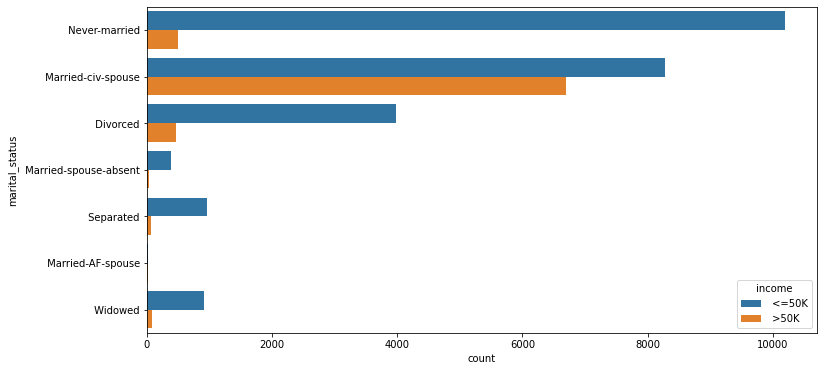

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(y="marital_status",hue="income",data=df)

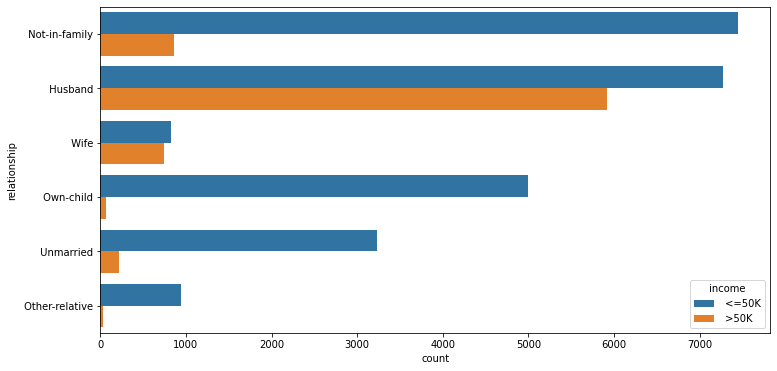

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(y="relationship",hue="income",data=df)

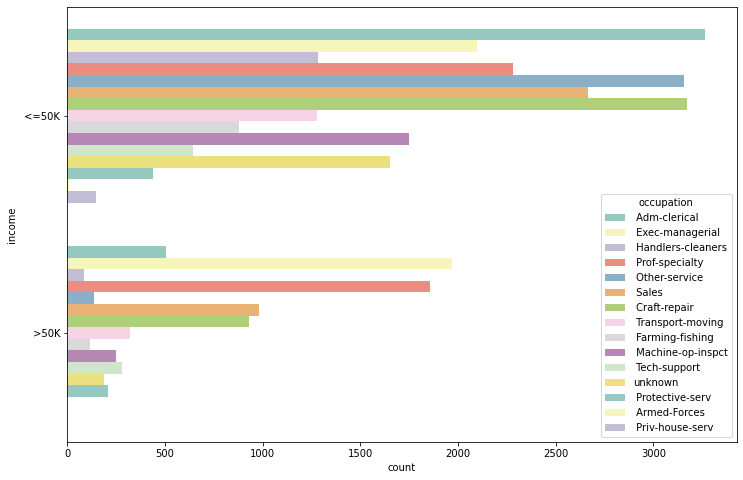

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(y="income", hue="occupation", data=df, palette="Set3")

In [38]:
df[df['income'] == ' <=50K']['age'].mean()

36.78373786407767

In [39]:
df[df['income'] == ' >50K']['age'].mean()

44.24984058155847

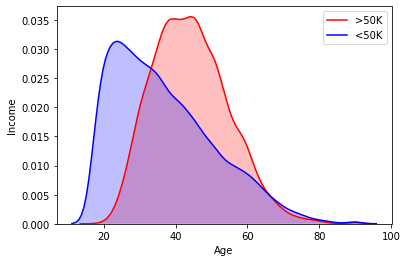

In [40]:
# Explore Age distibution 
g = sns.kdeplot(df["age"][(df["income"] == ' >50K')], color="Red", shade = True)
g = sns.kdeplot(df["age"][(df["income"] == " <=50K")], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Income")
g = g.legend([">50K","<50K"])

In [41]:
df[df['income'] == ' <=50K']['hours_per_week'].mean()

38.840210355987054

In [42]:
df[df['income'] == ' >50K']['hours_per_week'].mean()

45.473026399693914

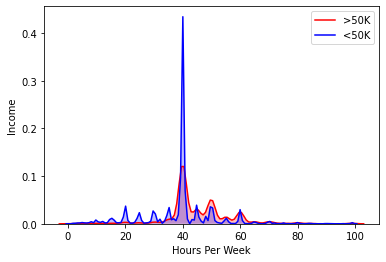

In [43]:
g = sns.kdeplot(df["hours_per_week"][(df["income"] == ' >50K')], color="Red", shade = True)
g = sns.kdeplot(df["hours_per_week"][(df["income"] == " <=50K")], ax =g, color="Blue", shade= True)
g.set_xlabel("Hours Per Week")
g.set_ylabel("Income")
g = g.legend([">50K","<50K"])

In [44]:
df[df['income'] == ' <=50K']['education_num'].mean()

9.595064724919094

In [45]:
df[df['income'] == ' >50K']['education_num'].mean()

11.611656676444332

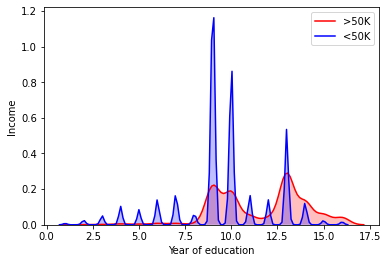

In [46]:
g = sns.kdeplot(df['education_num'][(df["income"] == ' >50K')], color="Red", shade = True)
g = sns.kdeplot(df['education_num'][(df["income"] == " <=50K")], ax =g, color="Blue", shade= True)
g.set_xlabel("Year of education")
g.set_ylabel("Income")
g = g.legend([">50K","<50K"])

# Data Preprocessing

One hot encode categorical variables and scale numerical variables to [0,1].

In [47]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df = dummies('workclass',df)
df = dummies('education',df)
df = dummies('marital_status',df)
df = dummies('occupation',df)
df = dummies('relationship',df)
df = dummies('race',df)
df = dummies('sex',df)
df = dummies('native_country',df)

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['age','education_num','hours_per_week','capital_gain', 'capital_loss','fnlwgt']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [49]:
X = df.drop(['income'], axis=1)
df['income']=pd.get_dummies(df.income)
#1 is <=50k, 0 is >50k
y = df['income']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# getting the shapes
print("Shape of x_train :", X_train.shape)
print("Shape of x_test :",X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (22792, 98)
Shape of x_test : (9769, 98)
Shape of y_train : (22792,)
Shape of y_test : (9769,)


In [51]:
X_train.head(6)

age    fnlwgt  education_num  capital_gain  capital_loss  \
32098  0.383562  0.107704       0.533333      0.072981           0.0   
25206  0.410959  0.065610       0.533333      0.018310           0.0   
23491  0.424658  0.119001       0.600000      0.000000           0.0   
12367  0.164384  0.090536       0.533333      0.000000           0.0   
7054   0.082192  0.129527       0.200000      0.000000           0.0   
369    0.301370  0.318370       0.533333      0.000000           0.0   

       hours_per_week   Local-gov   Never-worked   Private   Self-emp-inc  \
32098        0.602041           0              0         1              0   
25206        0.377551           0              0         0              0   
23491        0.500000           0              0         1              0   
12367        0.397959           0              0         1              0   
7054         0.244898           0              0         1              0   
369          0.397959           0              0         1              0   

       ...   Portugal   Puerto-Rico   Scotland   South   Taiwan   Thailand  \
32098  ...          0             0          0       0        0          0   
25206  ...          0             0          0       0        0          0   
23491  ...          0             0          0       0        0          0   
12367  ...          0             0          0       0        0          0   
7054   ...          0             0          0       0        0          0   
369    ...          0             0          0       0        0          0   

        Trinadad&Tobago   United-States   Vietnam   Yugoslavia  
32098                 0               1         0            0  
25206                 0               1         0            0  
23491                 0               1         0            0  
12367                 0               0         0            0  
7054                  0               0         0            0  
369                   0               1         0            0  

[6 rows x 98 columns]

# Feature Selection and Clustering

Use RandomForestClassifier for feature selection.

In [52]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

fnlwgt                         0.162621
age                            0.160394
capital_gain                   0.101819
hours_per_week                 0.086220
 Married-civ-spouse            0.067194
                                 ...   
 Outlying-US(Guam-USVI-etc)    0.000023
 Armed-Forces                  0.000018
 Honduras                      0.000008
 Never-worked                  0.000006
 Holand-Netherlands            0.000002
Length: 98, dtype: float64

Use K-means for clustering. When plotting the inertia as a function of the number of clusters. The inertia drops very quickly as the number of clusters increase up to 4, but it decreases much more slowly as the clusters increase. Thus I picked the the inflexion point, the "elbow" at the number of clusters=4.

In [54]:
from sklearn.cluster import KMeans
X1 = df[['fnlwgt','age','capital_gain']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

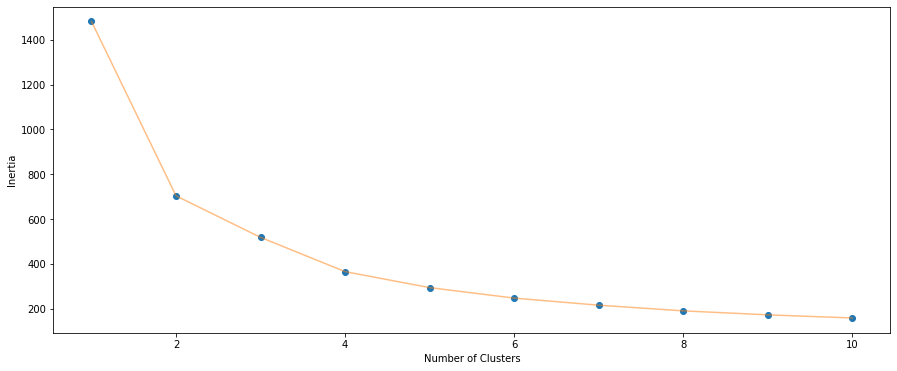

In [55]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [56]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [57]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['age'],
    y= df['fnlwgt'],
    z= df['education_num'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'fnlwgt'),
            yaxis = dict(title  = 'age'),
            zaxis = dict(title  = 'capital_gain')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

The target variable "income" has only two categories in this dataset, either ">50K" or "<=50K", but in reality it can be divided into many more categories, for example, 40K,60K,80K,100K, 4 categories in total. But from the plot, we can see that there is no clear boundary for each cluster.

# Classifiers
Simple classifiers, weighted classifiers, oversampling, undersampling

Build a pipeline for trying various sampling methods

In [58]:
from sklearn import metrics 
from collections import Counter

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours

def model_resampling_pipeline(X_train, X_test, y_train, y_test, model):
    results = {'ordinary': {},
               'class_weight': {},
               'oversample': {},
               'undersample': {}}
    
    # ------ No balancing ------
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    
    results['ordinary'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                          'fscore': fscore, 'n_occurences': support,
                          'predictions_count': Counter(predictions),
                          'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                          'auc': auc}
    
    
    # ------ Class weight ------
    if 'class_weight' in model.get_params().keys():
        model.set_params(class_weight='balanced')
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['class_weight'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                  'fscore': fscore, 'n_occurences': support,
                                  'predictions_count': Counter(predictions),
                                  'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                  'auc': auc}

    
    # ------------ OVERSAMPLING TECHNIQUES ------------
    print('------ Oversampling methods ------')
    techniques = [RandomOverSampler(),
                  SMOTE(),
                  ADASYN()]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['oversample'][technique] = {'accuracy': accuracy, 
                                            'precision': precision, 
                                            'recall': recall,
                                            'fscore': fscore, 
                                            'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'auc': auc}

    
    # ------------ UNDERSAMPLING TECHNIQUES ------------
    print('------ Undersampling methods ------')
    techniques = [RandomUnderSampler(),
                  NearMiss(version=1),
                  NearMiss(version=2),
                  TomekLinks(),
                  EditedNearestNeighbours()]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        if technique == 'NearMiss': technique+=str(sampler.version)
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['undersample'][technique] = {'accuracy': accuracy, 
                                            'precision': precision, 
                                            'recall': recall,
                                            'fscore': fscore, 
                                            'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'auc': auc}
        

    return results

Using TensorFlow backend.


Build tool to visualize results

In [59]:
def evaluate_method(results, method, metrics = ['precision', 'recall', 'fscore']):
    fig, ax = plt.subplots(1, 7, sharey=True, figsize=(16, 6))
    
    for i, metric in enumerate(metrics):
        ax[i*2].axhline(results['ordinary'][metric][0], label='No Resampling')
        ax[i*2+1].axhline(results['ordinary'][metric][1], label='No Resampling')
        
        if results['class_weight']:
            ax[i*2].bar(0, results['class_weight'][metric][0], label='Adjust Class Weight')
            ax[i*2+1].bar(0, results['class_weight'][metric][1], label='Adjust Class Weight')
            
        ax[0].legend(loc='upper center', bbox_to_anchor=(9, 1.01),
                     ncol=1, fancybox=True, shadow=True)
        
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i*2].bar(j+1, result[metric][0], label=technique)
            
            ax[i*2+1].bar(j+1, result[metric][1], label=technique)
        
        
        ax[i*2].set_title(f'>50K: \n{metric}')
        ax[i*2+1].set_title(f'<=50K: \n{metric}')
    
    # AUC vis
    ax[6].set_title(f'Area under curve')
    ax[6].axhline(results['ordinary']['auc'], label='No Resampling')
    if results['class_weight']:
        ax[6].bar(0, results['class_weight']['auc'], label='Adjust Class Weight')
    for j, (technique, result) in enumerate(results[method].items()):
        ax[6].bar(j+1, result['auc'], label=technique)

# Logistic Regression

In [60]:
model = LogisticRegression()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: SMOTE
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: ADASYN
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17673), (1, 17313)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss1
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss2
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: TomekLinks
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 16122)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 12518)]


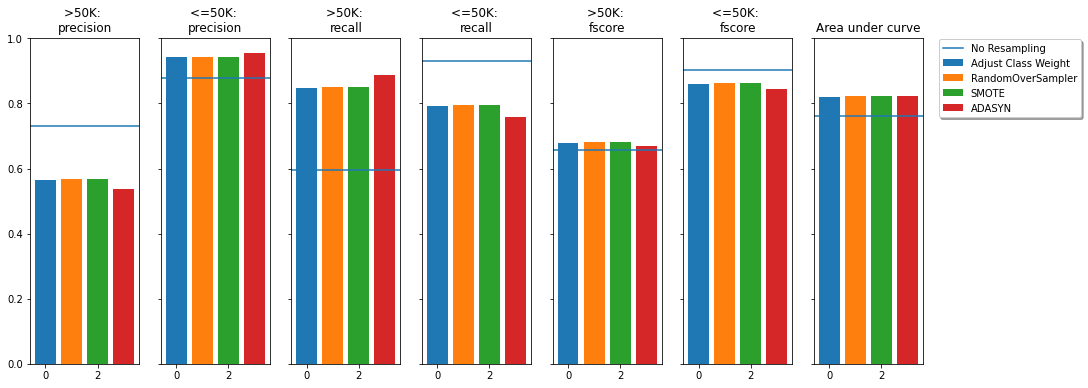

In [61]:
evaluate_method(results, 'oversample')

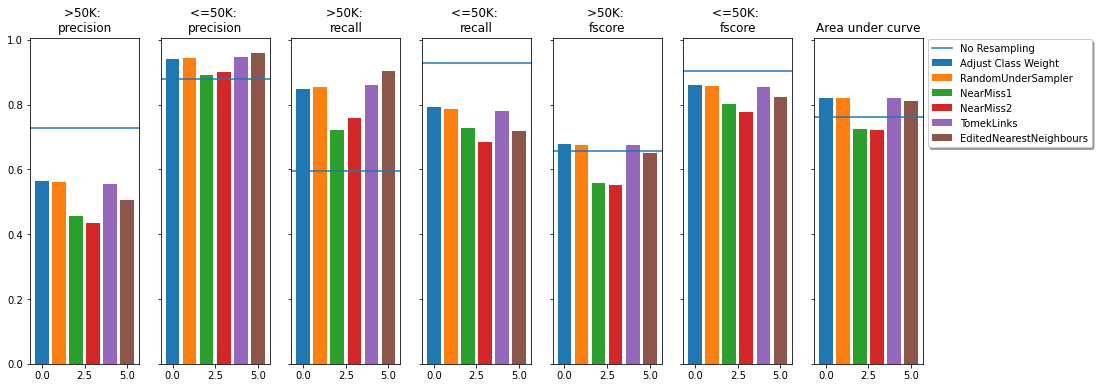

In [62]:
evaluate_method(results, 'undersample')

# Decision Tree

In [63]:
model = DecisionTreeClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: SMOTE
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: ADASYN
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17673), (1, 17313)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss1
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss2
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: TomekLinks
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 16122)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 12518)]


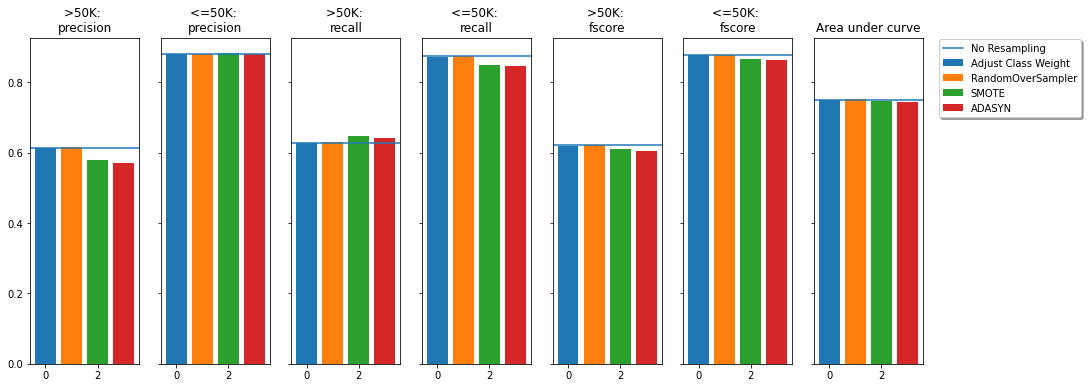

In [64]:
evaluate_method(results, 'oversample')

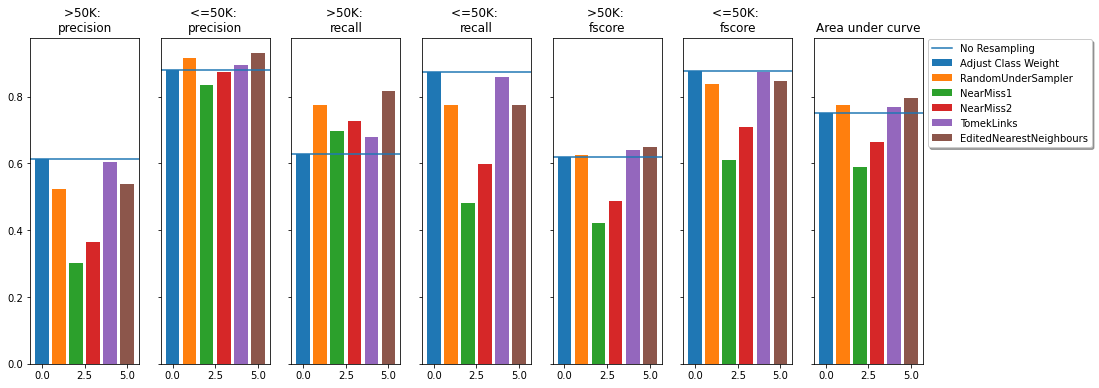

In [65]:
evaluate_method(results, 'undersample')

# Random Forests

In [66]:
model = RandomForestClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: SMOTE
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: ADASYN
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17673), (1, 17313)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss1
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss2
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: TomekLinks
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 16122)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 12518)]


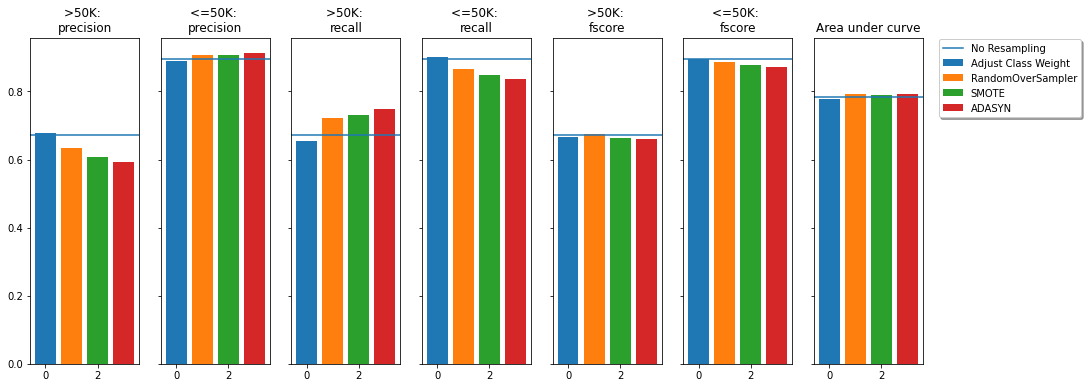

In [67]:
evaluate_method(results, 'oversample')

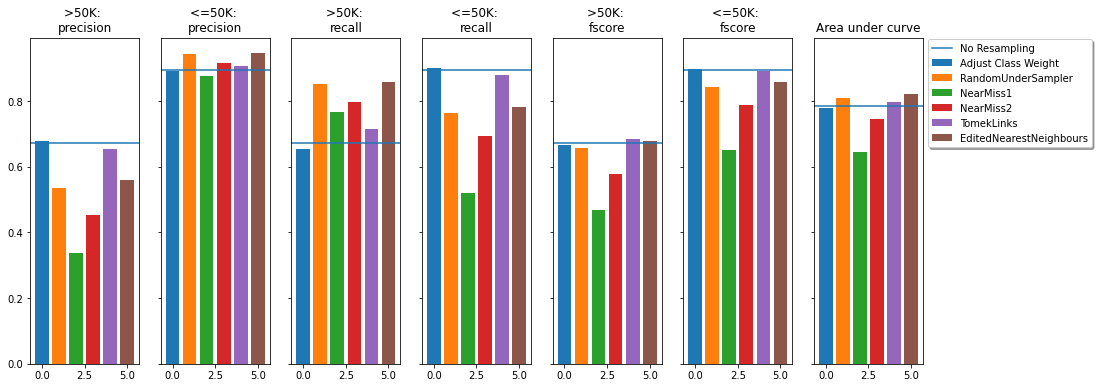

In [68]:
evaluate_method(results, 'undersample')

# Support Vector Classification

In [69]:
model = SVC()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: SMOTE
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: ADASYN
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17673), (1, 17313)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss1
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss2
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: TomekLinks
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 16122)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 12518)]


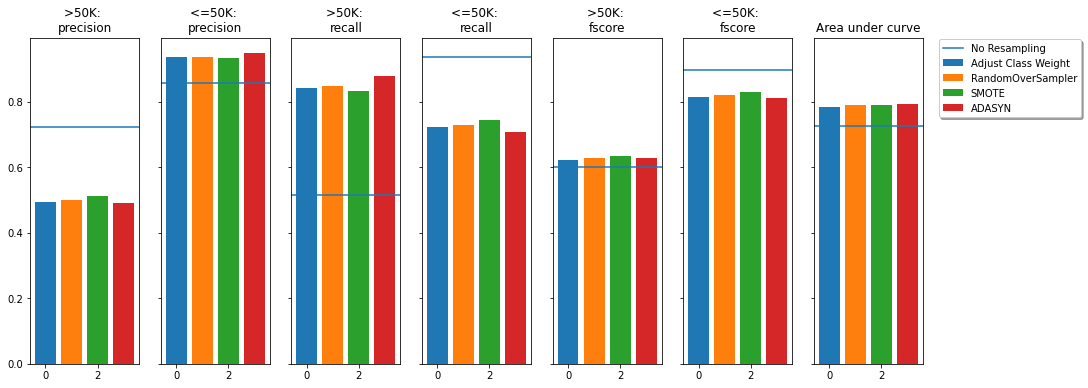

In [70]:
evaluate_method(results, 'oversample')

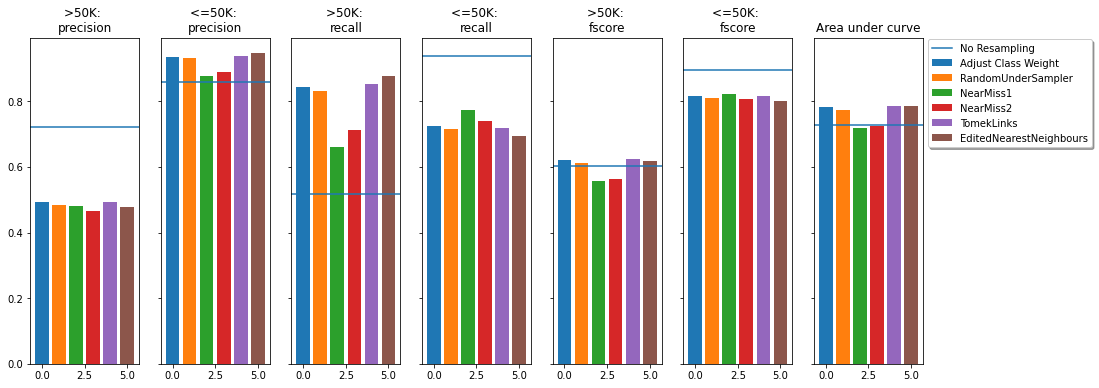

In [71]:
evaluate_method(results, 'undersample')

# K-nearest Neighbors

In [72]:
model = KNeighborsClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: SMOTE
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: ADASYN
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17673), (1, 17313)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss1
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss2
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: TomekLinks
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 16122)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 12518)]


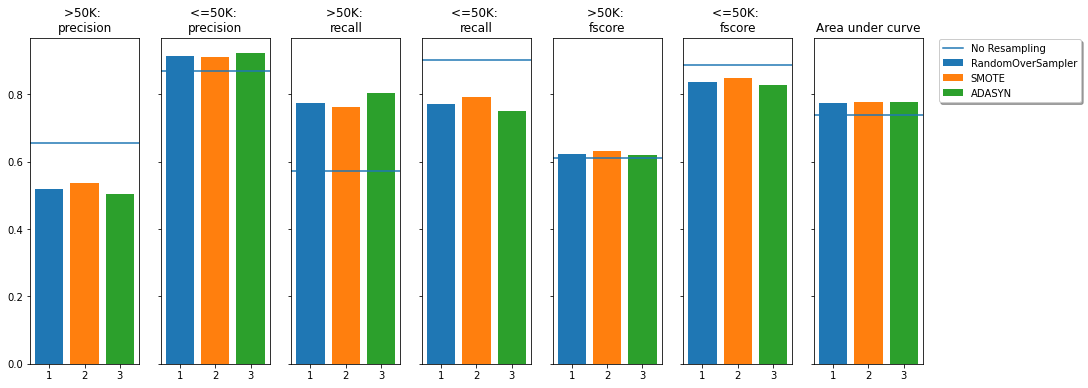

In [73]:
evaluate_method(results, 'oversample')

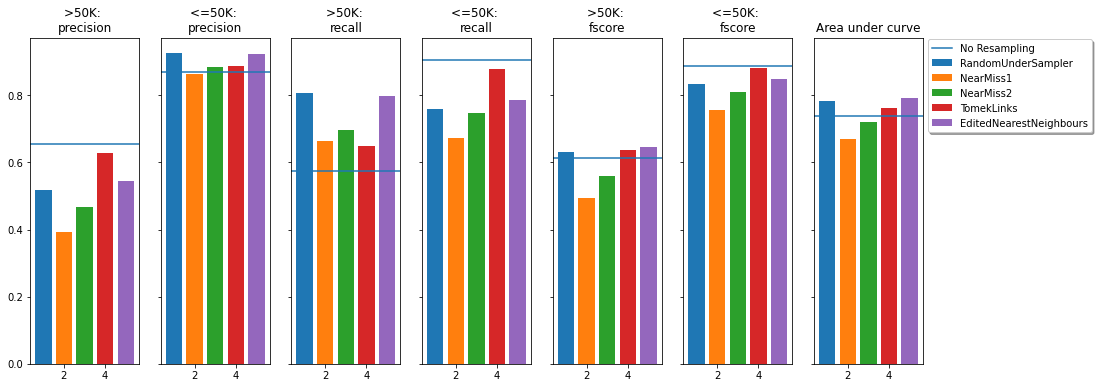

In [74]:
evaluate_method(results, 'undersample')

# Gaussian Naive Bayes

In [75]:
model=GaussianNB()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: SMOTE
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: ADASYN
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17673), (1, 17313)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss1
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss2
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: TomekLinks
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 16122)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 12518)]


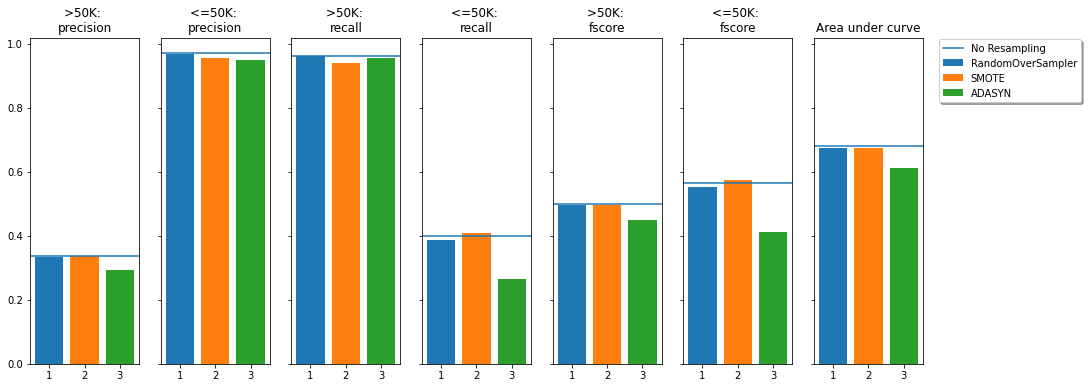

In [76]:
evaluate_method(results, 'oversample')

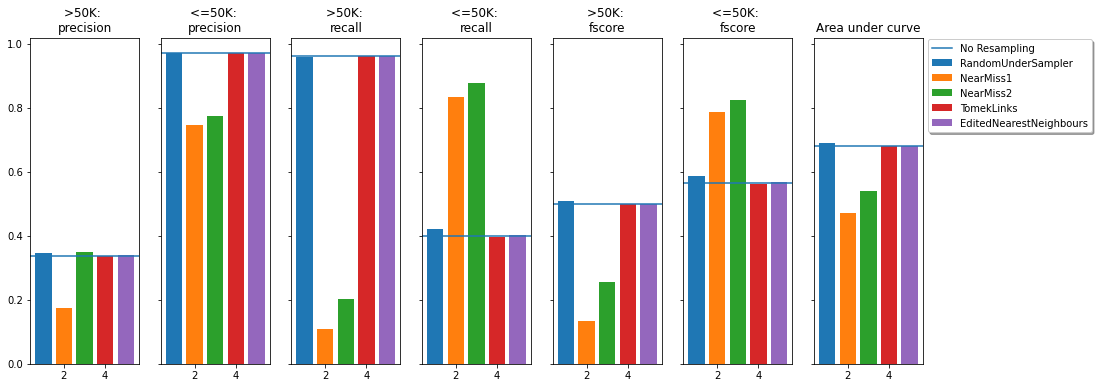

In [77]:
evaluate_method(results, 'undersample')

# Quadratic Discriminant Analysis

In [78]:
model= QuadraticDiscriminantAnalysis()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: SMOTE
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: ADASYN
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17673), (1, 17313)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss1
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss2
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: TomekLinks
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 16122)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 12518)]


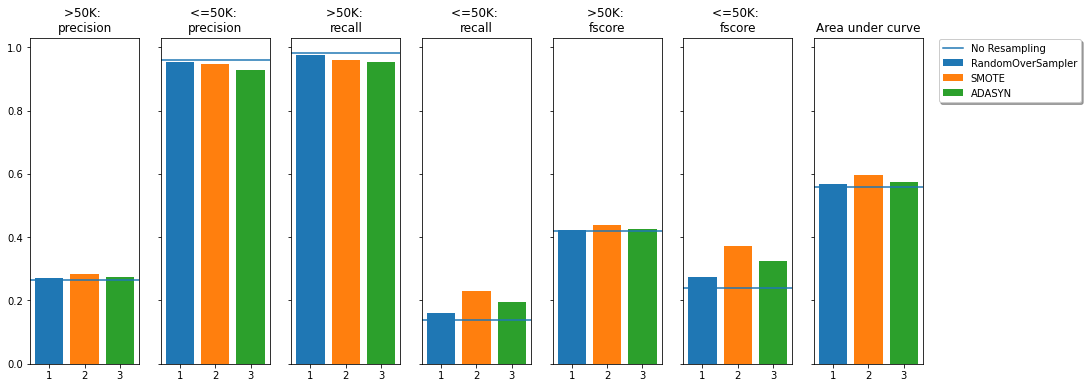

In [79]:
evaluate_method(results, 'oversample')

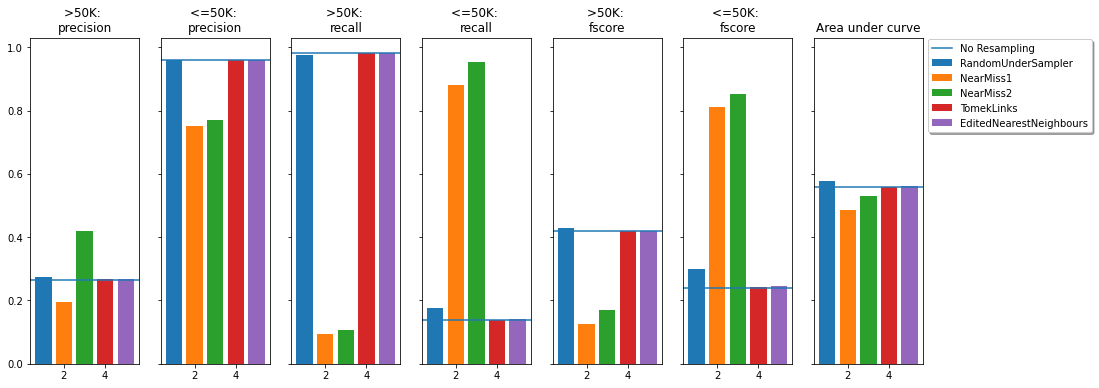

In [80]:
evaluate_method(results, 'undersample')

# AdaBoost

In [81]:
model = AdaBoostClassifier()
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: SMOTE
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: ADASYN
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17673), (1, 17313)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss1
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss2
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: TomekLinks
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 16122)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 12518)]


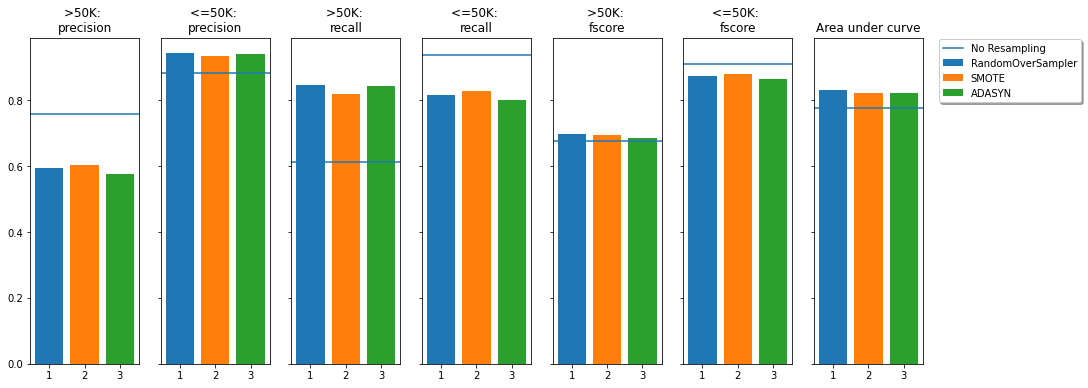

In [82]:
evaluate_method(results, 'oversample')

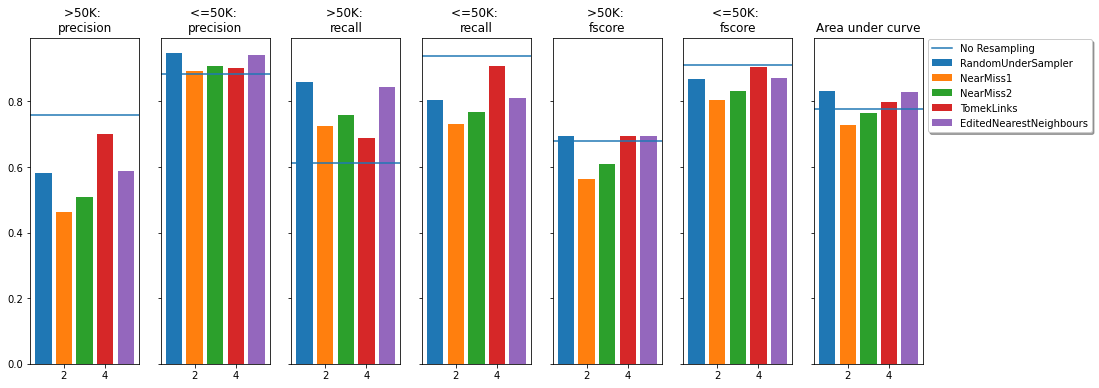

In [83]:
evaluate_method(results, 'undersample')

# Gradient Boosting

In [84]:
model=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: SMOTE
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: ADASYN
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17673), (1, 17313)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss1
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss2
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: TomekLinks
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 16122)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 12518)]


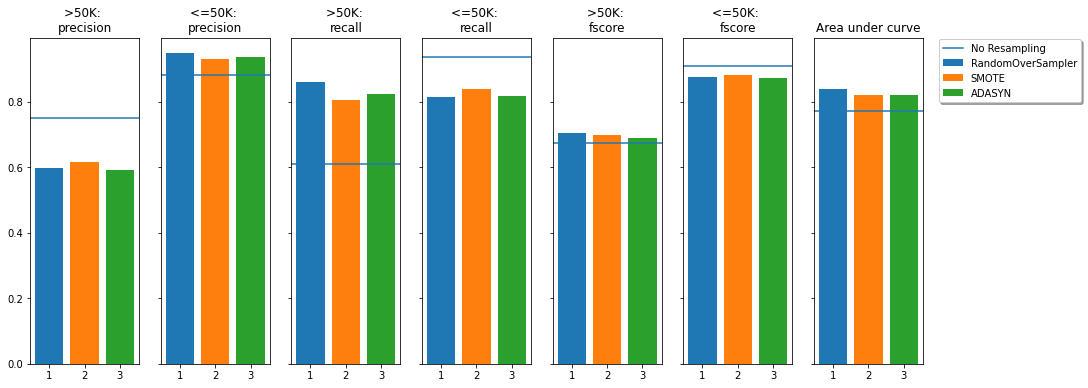

In [85]:
evaluate_method(results, 'oversample')

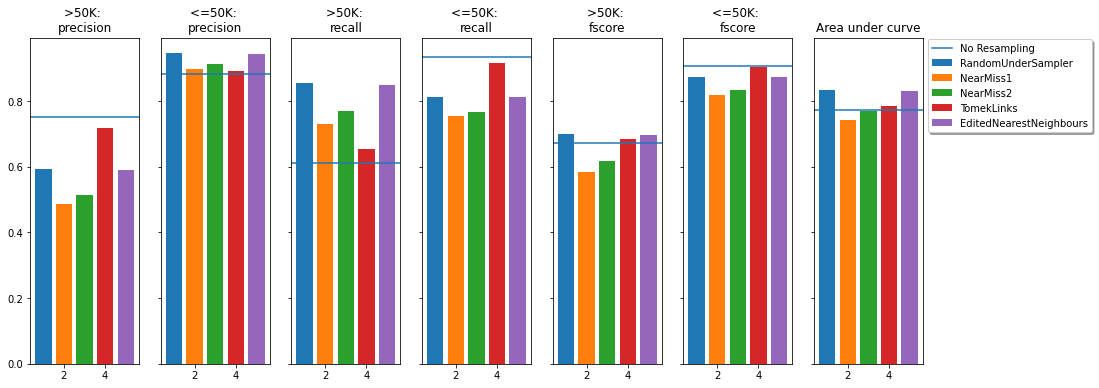

In [86]:
evaluate_method(results, 'undersample')

# Multi-layer Perceptron Classifier

In [87]:
model = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='lbfgs')
results = model_resampling_pipeline(X_train, X_test, y_train, y_test, model)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: SMOTE
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17313), (1, 17313)]
Technique: ADASYN
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 17673), (1, 17313)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss1
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: NearMiss2
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 5479)]
Technique: TomekLinks
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 16122)]
Technique: EditedNearestNeighbours
Before resampling: [(0, 5479), (1, 17313)]
After resampling: [(0, 5479), (1, 12518)]


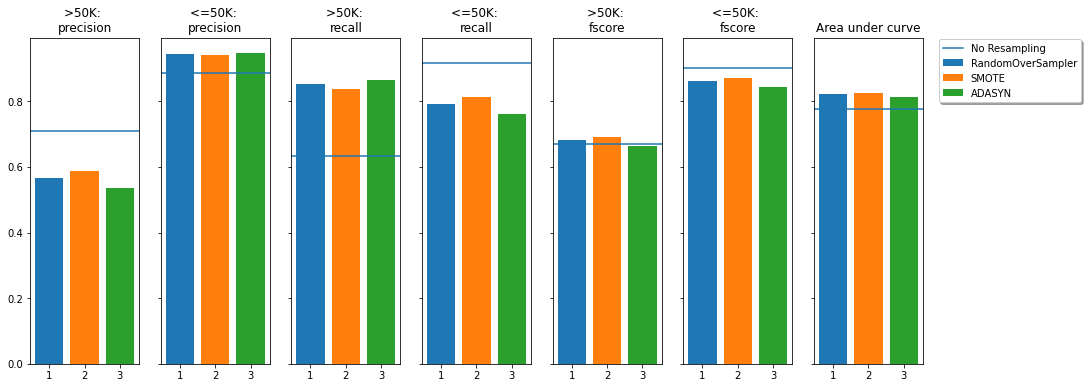

In [88]:
evaluate_method(results, 'oversample')

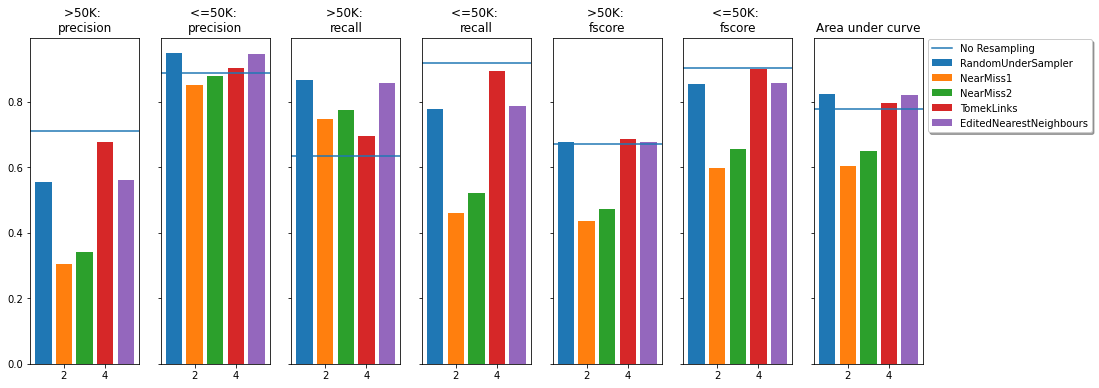

In [89]:
evaluate_method(results, 'undersample')